In [159]:
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import config
import logging
import importlib
import time
import random
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.common.exceptions import TimeoutException
import validators
import pickle
import time
import random
from calendar import monthrange
import re
import spacy
from spacy.tokens import Doc, Span
import nltk
from nltk.corpus import stopwords
from nltk.corpus import treebank
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

from nltk import pos_tag, sent_tokenize, wordpunct_tokenize

pd.options.display.max_columns = 300
import string
import unicodedata

In [7]:
# with open('nyt_data.json') as f:
#     nyt_dict = json.load(f)

In [4]:
nyt_data_list = []

In [5]:
with open('nyt_data.json') as f:
    for line in f:
        nyt_data_list.append(eval(line))

In [6]:
cols = ['paper', 'date', 'section', 'url', 'headline', 'text']

In [7]:
df = pd.DataFrame.from_records(nyt_data_list, columns=cols)

In [8]:
df.head()

,paper,date,section,url,headline,text
0,NYT,2019-10-01,World,https://www.nytimes.com/2019/10/01/world/europ...,Finland School Stabbing Leaves 1 Dead and 10 I...,A stabbing attack on Tuesday at a vocational c...
1,NYT,2019-10-01,U.S.,https://www.nytimes.com/2019/09/30/us/judge-ca...,Federal Judge in Kansas City Is Reprimanded fo...,A federal judge in Kansas was given a rare pub...
2,NYT,2019-10-01,World,https://www.nytimes.com/2019/10/01/world/asia/...,"Protests Erupt in Hong Kong, Overshadowing Chi...",BEIJING — China’s authoritarian president used...
3,NYT,2019-10-02,U.S.,https://www.nytimes.com/2019/10/02/us/politics...,"Bernie Sanders Is Hospitalized, Raising Questi...",Senator Bernie Sanders was recovering in a Las...
4,NYT,2019-10-02,World,https://www.nytimes.com/2019/10/02/world/asia/...,China’s Global Message: We Are Tough but Not T...,BEIJING — As President Xi Jinping watched from...


In [9]:
df.iloc[0]['text']

'A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said. The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said. The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police.Reports of the attack came in shortly after noon local time, the police said in a statement. “Upon arrest, police used a firearm,” it said. “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital.”The area was evacuated and an investigation is underway. A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby. As she was leaving the area, she add

In [10]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/markbrennan/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/markbrennan/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [11]:
nlp = spacy.load('en')

In [33]:
' '.join([ word.lemma_ for word in NLP(df.iloc[0]['text'])])

'a stab attack on Tuesday at a vocational college in a shopping center in Finland kill one person and injure 10 other , the police say . the suspect in the attack be a finnish student at the college , Savo Vocational College , which be at the Herman shopping center in the city of Kuopio , the police say . the assailant " have a sabre - like bladed weapon and a firearm in possession , " and both student and staff member be injure , as well as an officer who reportedly suffer minor injury , accord to the police . report of the attack come in shortly after noon local time , the police say in a statement . " upon arrest , police use a firearm , " -PRON- say . " the suspect be seriously injure in the arrest and be be treat at Kuopio University Hospital . ”The area be evacuate and an investigation be underway . a student , Janette Blomberg , 16 , tell the finnish newspaper Helsingin Sanomat that -PRON- have be in class when -PRON- hear a man shout nearby . as -PRON- be leave the area , -PRON

In [35]:
l = [(df.iloc[0]['text'])]

In [36]:
l

['A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said. The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said. The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police.Reports of the attack came in shortly after noon local time, the police said in a statement. “Upon arrest, police used a firearm,” it said. “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital.”The area was evacuated and an investigation is underway. A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby. As she was leaving the area, she ad

In [39]:
t = (df.iloc[0]['text'])

In [42]:
lt = t.split('.')

In [43]:
len(lt)

12

In [44]:
lt

['A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said',
 ' The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said',
 ' The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police',
 'Reports of the attack came in shortly after noon local time, the police said in a statement',
 ' “Upon arrest, police used a firearm,” it said',
 ' “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital',
 '”The area was evacuated and an investigation is underway',
 ' A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby',
 ' As 

In [57]:
tokens.extend([nltk.word_tokenize(sentence) for sentence in lt])

In [59]:
tokens = []
for sentence in lt:
    tokens.extend(nltk.word_tokenize(sentence))

In [71]:
tokens

['A',
 'stabbing',
 'attack',
 'on',
 'Tuesday',
 'at',
 'a',
 'vocational',
 'college',
 'in',
 'a',
 'shopping',
 'center',
 'in',
 'Finland',
 'killed',
 'one',
 'person',
 'and',
 'injured',
 '10',
 'others',
 ',',
 'the',
 'police',
 'said',
 'The',
 'suspect',
 'in',
 'the',
 'attack',
 'is',
 'a',
 'Finnish',
 'student',
 'at',
 'the',
 'college',
 ',',
 'Savo',
 'Vocational',
 'College',
 ',',
 'which',
 'is',
 'at',
 'the',
 'Herman',
 'shopping',
 'center',
 'in',
 'the',
 'city',
 'of',
 'Kuopio',
 ',',
 'the',
 'police',
 'said',
 'The',
 'assailant',
 '“',
 'had',
 'a',
 'sabre-like',
 'bladed',
 'weapon',
 'and',
 'a',
 'firearm',
 'in',
 'possession',
 ',',
 '”',
 'and',
 'both',
 'students',
 'and',
 'staff',
 'members',
 'were',
 'injured',
 ',',
 'as',
 'well',
 'as',
 'an',
 'officer',
 'who',
 'reportedly',
 'suffered',
 'minor',
 'injuries',
 ',',
 'according',
 'to',
 'the',
 'police',
 'Reports',
 'of',
 'the',
 'attack',
 'came',
 'in',
 'shortly',
 'after',
 'n

In [77]:
tagged = nltk.pos_tag(tokens)

In [78]:
tagged

[('A', 'DT'),
 ('stabbing', 'JJ'),
 ('attack', 'NN'),
 ('on', 'IN'),
 ('Tuesday', 'NNP'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('vocational', 'JJ'),
 ('college', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('shopping', 'NN'),
 ('center', 'NN'),
 ('in', 'IN'),
 ('Finland', 'NNP'),
 ('killed', 'VBD'),
 ('one', 'CD'),
 ('person', 'NN'),
 ('and', 'CC'),
 ('injured', 'VBD'),
 ('10', 'CD'),
 ('others', 'NNS'),
 (',', ','),
 ('the', 'DT'),
 ('police', 'NN'),
 ('said', 'VBD'),
 ('The', 'DT'),
 ('suspect', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('attack', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('Finnish', 'JJ'),
 ('student', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('college', 'NN'),
 (',', ','),
 ('Savo', 'NNP'),
 ('Vocational', 'NNP'),
 ('College', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('is', 'VBZ'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Herman', 'NNP'),
 ('shopping', 'NN'),
 ('center', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('city', 'NN'),
 ('of', 'IN'),
 ('Kuopio', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('pol

In [79]:
entities = nltk.chunk.ne_chunk(tagged)

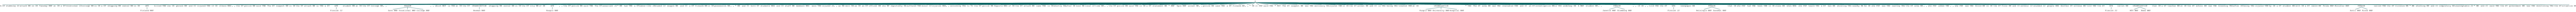

In [80]:
entities

In [87]:
lemmatize = WordNetLemmatizer()

In [88]:
type(lemmatize)

nltk.stem.wordnet.WordNetLemmatizer

In [95]:
text = nltk.Text(word.lower() for word in tokens)

In [96]:
text

<Text: a stabbing attack on tuesday at a vocational...>

In [100]:
text.similar(

No matches


In [101]:
text.generate()

said in a shopping center in the arrest and is being treated at kuopio
university hospital ” the area , she saw blood on the floor and
several wounded people another witness told the finnish outlet mtv
news that a teacher at the college , savo vocational college in a
shopping center in the attack is a finnish student at the herman
shopping center in the arrest and is being treated at kuopio
university hospital ” the area , she saw blood on the floor and
several wounded people another witness told the finnish newspaper
helsingin sanomat that she had


Building ngram index...


'said in a shopping center in the arrest and is being treated at kuopio\nuniversity hospital ” the area , she saw blood on the floor and\nseveral wounded people another witness told the finnish outlet mtv\nnews that a teacher at the college , savo vocational college in a\nshopping center in the attack is a finnish student at the herman\nshopping center in the arrest and is being treated at kuopio\nuniversity hospital ” the area , she saw blood on the floor and\nseveral wounded people another witness told the finnish newspaper\nhelsingin sanomat that she had'

In [110]:
text.vocab()

FreqDist({'the': 22, ',': 15, 'a': 13, 'in': 9, 'and': 9, 'at': 5, 'police': 5, 'said': 5, 'was': 5, 'she': 5, ...})

In [60]:
my_stopwords = set(stopwords.words('english'))

In [61]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [114]:
len(tokens)

248

In [115]:
words = [token for token in tokens if token not in my_stopwords]

In [116]:
len(words)

156

In [117]:
text = nltk.Text(word.lower() for word in words)

In [118]:
text.vocab()

FreqDist({',': 15, 'police': 5, 'said': 5, 'injured': 4, 'the': 4, '“': 4, '”': 4, 'attack': 3, 'college': 3, 'finnish': 3, ...})

In [123]:
text

<Text: a stabbing attack tuesday vocational college shopping center...>

In [127]:
doc = NLP(df.iloc[0]['text'])

In [128]:
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])

Noun phrases: ['A stabbing attack', 'Tuesday', 'a vocational college', 'a shopping center', 'Finland', 'one person', '10 others', 'the police', 'The suspect', 'the attack', 'a Finnish student', 'the college', 'Savo Vocational College', 'which', 'the Herman shopping center', 'the city', 'Kuopio', 'the police', 'The assailant', 'a sabre-like bladed weapon', 'a firearm', 'possession', 'both students', 'staff members', 'an officer', 'who', 'minor injuries', 'the police', 'Reports', 'the attack', 'noon', 'local time', 'the police', 'a statement', 'arrest', 'police', 'a firearm', 'it', 'The suspect', 'the arrest', 'Kuopio University Hospital', '”The area', 'an investigation', 'A student', 'Janette Blomberg', 'the Finnish newspaper', 'Helsingin Sanomat', 'she', 'class', 'she', 'a man', 'she', 'the area', 'she', 'she', 'blood', 'the floor', 'several wounded people', 'Another witness', 'the Finnish outlet', 'MTV News', 'a teacher', 'the school', 'a student', 'a sword', 'Prime Minister Antti Rin

In [129]:
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Verbs: ['stab', 'kill', 'injure', 'say', 'say', 'injure', 'suffer', 'accord', 'come', 'say', 'use', 'say', 'injure', 'treat', 'evacuate', 'tell', 'hear', 'shout', 'leave', 'add', 'see', 'wound', 'tell', 'bleed', 'injure', 'call', 'say', 'monitor']


In [130]:
for entity in doc.ents:
    print(entity.text, entity.label_)

Tuesday DATE
Finland GPE
one CARDINAL
10 CARDINAL
Finnish NORP
Savo Vocational College ORG
Herman ORG
Kuopio GPE
noon TIME
Kuopio University Hospital ORG
”The area GPE
Janette Blomberg PERSON
16 DATE
Finnish NORP
Helsingin Sanomat PERSON
Finnish NORP
MTV News ORG
Antti Rinne PERSON


In [139]:
[token.text for token in doc]

['A',
 'stabbing',
 'attack',
 'on',
 'Tuesday',
 'at',
 'a',
 'vocational',
 'college',
 'in',
 'a',
 'shopping',
 'center',
 'in',
 'Finland',
 'killed',
 'one',
 'person',
 'and',
 'injured',
 '10',
 'others',
 ',',
 'the',
 'police',
 'said',
 '.',
 'The',
 'suspect',
 'in',
 'the',
 'attack',
 'is',
 'a',
 'Finnish',
 'student',
 'at',
 'the',
 'college',
 ',',
 'Savo',
 'Vocational',
 'College',
 ',',
 'which',
 'is',
 'at',
 'the',
 'Herman',
 'shopping',
 'center',
 'in',
 'the',
 'city',
 'of',
 'Kuopio',
 ',',
 'the',
 'police',
 'said',
 '.',
 'The',
 'assailant',
 '“',
 'had',
 'a',
 'sabre',
 '-',
 'like',
 'bladed',
 'weapon',
 'and',
 'a',
 'firearm',
 'in',
 'possession',
 ',',
 '”',
 'and',
 'both',
 'students',
 'and',
 'staff',
 'members',
 'were',
 'injured',
 ',',
 'as',
 'well',
 'as',
 'an',
 'officer',
 'who',
 'reportedly',
 'suffered',
 'minor',
 'injuries',
 ',',
 'according',
 'to',
 'the',
 'police',
 '.',
 'Reports',
 'of',
 'the',
 'attack',
 'came',
 'in

In [136]:
len(doc.vocab)

603

In [197]:
from spacy.vocab import Vocab
vocab = Vocab(strings=[token.text for token in doc])


In [160]:
words = [lex for lex in vocab]

In [161]:
len(words)

136

In [162]:
for word in words:print(word.text)

Prime
situation
told
underway
being
people
students
Blomberg
Vocational
were
said
College
Herman
possession
arrest
it
violence
a
city
”
been
outlet
by
Hospital
heard
completely
leaving
”The
treated
floor
is
shortly
16
an
college
man
police
wounded
Another
Finnish
according
saw
witness
As
one
seriously
10
well
Antti
was
in
suspect
at
evacuated
assailant
investigation
area
minor
shouting
teacher
noon
with
government
attack
Tuesday
reportedly
Reports
officer
nearby
weapon
vocational
sabre
Helsingin
like
had
bleeding
members
injured
after
student
to
Rinne
the
Upon
stabbing
killed
Sanomat
MTV
time
.
used
shopping
who
“
News
Janette
added
suffered
-
Finland
,
bladed
on
of
local
blood
called
unacceptable
when
which
Minister
A
person
Savo
she
and
University
staff
newspaper
shocking
monitoring
that
came
several
The
as
others
school
Kuopio
sword
firearm
center
class
statement
both
injuries


In [172]:
doc[0:-1]

A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said. The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said. The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police.Reports of the attack came in shortly after noon local time, the police said in a statement. “Upon arrest, police used a firearm,” it said. “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital.”The area was evacuated and an investigation is underway. A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby. As she was leaving the area, she adde

In [177]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [178]:
[word for word in doc if word.lower() not in my_stopwords]

TypeError: 'int' object is not callable

In [188]:
len(doc)

260

In [186]:
lex = [word.lemma_ for word in doc if word.text.lower() not in my_stopwords]

In [189]:
len(lex)

162

In [190]:
len(set(lex))

105

In [173]:
lex = [word.lemma_ for word in doc if word not in my_stopwords]

In [174]:
lex

['a',
 'stab',
 'attack',
 'on',
 'Tuesday',
 'at',
 'a',
 'vocational',
 'college',
 'in',
 'a',
 'shopping',
 'center',
 'in',
 'Finland',
 'kill',
 'one',
 'person',
 'and',
 'injure',
 '10',
 'other',
 ',',
 'the',
 'police',
 'say',
 '.',
 'the',
 'suspect',
 'in',
 'the',
 'attack',
 'be',
 'a',
 'finnish',
 'student',
 'at',
 'the',
 'college',
 ',',
 'Savo',
 'Vocational',
 'College',
 ',',
 'which',
 'be',
 'at',
 'the',
 'Herman',
 'shopping',
 'center',
 'in',
 'the',
 'city',
 'of',
 'Kuopio',
 ',',
 'the',
 'police',
 'say',
 '.',
 'the',
 'assailant',
 '"',
 'have',
 'a',
 'sabre',
 '-',
 'like',
 'bladed',
 'weapon',
 'and',
 'a',
 'firearm',
 'in',
 'possession',
 ',',
 '"',
 'and',
 'both',
 'student',
 'and',
 'staff',
 'member',
 'be',
 'injure',
 ',',
 'as',
 'well',
 'as',
 'an',
 'officer',
 'who',
 'reportedly',
 'suffer',
 'minor',
 'injury',
 ',',
 'accord',
 'to',
 'the',
 'police',
 '.',
 'report',
 'of',
 'the',
 'attack',
 'come',
 'in',
 'shortly',
 'after

In [203]:
NLP.vocab.strings[coffee_hash]

KeyError: "[E018] Can't retrieve string for hash '3197928453018144401'. This usually refers to an issue with the `Vocab` or `StringStore`."

In [218]:
del vocab

In [219]:
vocab = Vocab(strings=[word.lemma_ for word in doc if word.text.lower() not in my_stopwords])

In [220]:
for l in vocab:
    print(l.text)

Prime
situation
underway
wound
people
treat
Blomberg
say
injure
Vocational
member
College
Herman
other
possession
arrest
violence
city
outlet
kill
Hospital
evacuate
completely
”The
leave
use
shortly
16
man
see
college
stab
police
floor
witness
one
seriously
10
well
Antti
suspect
investigation
government
assailant
monitor
area
minor
teacher
noon
attack
Tuesday
reportedly
officer
nearby
add
weapon
vocational
sabre
come
like
Helsingin
upon
student
Rinne
bleed
Sanomat
MTV
time
.
shopping
"
News
Janette
-
Finland
finnish
,
bladed
local
shout
blood
unacceptable
injury
Minister
person
Savo
call
University
shocking
staff
newspaper
accord
report
several
another
Kuopio
school
hear
sword
firearm
center
class
suffer
tell
statement


In [221]:
len(vocab)

105

In [225]:
text = df.iloc[0].text

In [227]:
words = text.split()

In [230]:
doc = Doc(nlp.vocab, words=words)

In [231]:
doc

A stabbing attack on Tuesday at a vocational college in a shopping center in Finland killed one person and injured 10 others, the police said. The suspect in the attack is a Finnish student at the college, Savo Vocational College, which is at the Herman shopping center in the city of Kuopio, the police said. The assailant “had a sabre-like bladed weapon and a firearm in possession,” and both students and staff members were injured, as well as an officer who reportedly suffered minor injuries, according to the police.Reports of the attack came in shortly after noon local time, the police said in a statement. “Upon arrest, police used a firearm,” it said. “The suspect was seriously injured in the arrest and is being treated at Kuopio University Hospital.”The area was evacuated and an investigation is underway. A student, Janette Blomberg, 16, told the Finnish newspaper Helsingin Sanomat that she had been in class when she heard a man shouting nearby. As she was leaving the area, she adde

In [233]:
for l in nlp.vocab:
    print(l.text)

nuthin
there
ü.
’nuff
havin
'bout
’Cause
Need
Somethin
gon
people.Another
N.C.
students
\n
 
Sept.
c.
E.G.
Mont.
sabre-like
b.
:-}
Vocational
got
it
Jr.
=3
>.>
Calif.
:}
nearby.
Ill.
O'clock
o'clock
leaving
Mich.
is
:-o
n.
w/o
Might
college
16,
>.<
according
:))
witness
It
Wash.
where
:-*
g.
:()
)-:
S.C.
at
Ark.
0.o
shouting
teacher
noon
College,
must
Goin'
Mass.
Ma’am
\")
co.
reportedly
area,
’coz
</3
Id.
(-_-)
St.
^___^
=|
v_v
had
:’-(
vs.
x.
injured
><(((*>
members
(>_<)
does
nothin’
’S
:'(
killed
Ma'am
Havin'
8-)
Why
(=
Would
do
k.
a.m.
Rev.
’s
N.M.
Wo
:-3
May.
Apr.
Miss.
O.o
blood
might
q.
when
which
o_0
Adm.
lovin’
Gen.
Goin’
Is
she
 
’’
Feb.
Has
Fla.
pm
N.J.
ought
-__-
person
Messrs.
ol'
“Upon
<333
(-;
Ore.
<space>
may
(o:
h.
injured,
all
doin’
Doin
v.v
firearm
both
what
Kan.
Minn.
p.m.
7
and/or
'cos
‘S
:X
's
N.H.
''
;D
i.
nothin
Must
said
Bros.
8-D
:-D
somethin
Nev.
What
z.
’Cuz
by
’
'Cause
treated
9
shortly
Dec.
an
man
Jun.
:-))
;_;
When
Finnish
Gon
re
added,
D.C.
Have
There
\

In [234]:
len(nlp.vocab)

604

In [235]:
empty_doc = Doc(Vocab())

In [236]:
empty_doc.vocab.strings.add("coffee")

3197928453018144401

In [242]:
for l in empty_doc.vocab:
    print(l.text)

In [243]:
print(empty_doc.vocab.strings[3197928453018144401]) 

coffee


In [247]:
len(empty_doc.vocab)

0

In [ ]:
from spacy import displacy

doc_dep = nlp("This is a sentence.")
displacy.render(doc_dep, style="dep")

doc_ent = nlp("When Sebastian Thrun started working on self-driving cars at Google "
              "in 2007, few people outside of the company took him seriously.")
displacy.render(doc_ent, style="ent")

In [12]:
from spacy.vocab import Vocab
vocab = Vocab()

In [13]:
text = df.iloc[0].text

In [14]:
words = text.split()

In [16]:
doc = Doc(vocab, words=words)

In [21]:
len(doc)

221

In [20]:
len(vocab)

137

In [22]:
text2 = df.iloc[1].text

In [23]:
doc2 = Doc(vocab, words=[word for word in text2.split()])

In [24]:
doc2

A federal judge in Kansas was given a rare public reprimand on Monday for sexually harassing female judiciary employees and having an affair with a felon that made him “susceptible to extortion.”The judge, Carlos Murguia, of the United States District Court in Kansas City, made sexually suggestive comments and sent inappropriate text messages to the employees, according to an order issued by a judicial council. Judge Murguia continued to harass employees even after one of them told him to stop, according to the order, which was written by Timothy M. Tymkovich, the chief judge of the Court of Appeals for the Tenth Circuit.The order also said that Judge Murguia’s yearslong affair with a felon who was on probation put him in “such a compromised position that he made himself susceptible to extortion.” Judge Murguia was also reprimanded for being “habitually late” for court meetings, Judge Tymkovich wrote.“As judges, we have an obligation to foster a nondiscriminatory and courteous workplac

In [25]:
len(vocab)

484

In [26]:
for i in vocab:print(i.text)

there
during
susceptible
people.Another
nonprofit
“power
light
students
order,
sabre-like
Vocational
Bill
it.”Judge
its
it
them.”He
issues
law
Jr.
statement.“I
G.
courteous
1985
nearby.
Robinson,
leaving
retired
court
is
someone
reported.
District
college
severe
often
16,
Appeals
least
according
it’s
witness
responsibility
It
extortion.”
regret
obligations.”Judge
occurred,
at
shouting
teacher
noon
outside
reprimand
College,
so
must
reportedly
area,
Law.
much
treatment”
ago.“My
had
punishment
members
injured
“unwanted
night.”Many
Judiciary,”
harassing
Circuit.The
interfere
does
killed
behavior,
D.
City,
stop,
unacceptable,
public
Press.
brought
duty
“habitually
do
before
view
hours
Monday
or
blood
nonwork-related
Chief
when
which
person
she
then
late”
than
“Upon
Murguia’s
allegations
“I
contact,
held
maintain
action,
strive
injured,
also
Federal
more
details
15
clear
exactly
resolved
firearm
nondiscriminatory
inappropriate
both
Tymkovich,
written
what
tell
because
Monday.
Tenth
complain

In [27]:
doc2.sents

In [37]:
sents = list(doc.sents)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: nlp.add_pipe(nlp.create_pipe('sentencizer')) Alternatively, add the dependency parser, or set sentence boundaries by setting doc[i].is_sent_start.

In [34]:
doc[0].is_sent_start

True

In [39]:
from spacy.pipeline import DependencyParser
parser = DependencyParser(vocab)

In [31]:
list(doc.sents)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: nlp.add_pipe(nlp.create_pipe('sentencizer')) Alternatively, add the dependency parser, or set sentence boundaries by setting doc[i].is_sent_start.

In [40]:
processed = parser(doc)

ValueError: [E109] Model for component 'parser' not initialized. Did you forget to load a model, or forget to call begin_training()?

In [42]:
# Construction via create_pipe
textcat = nlp.create_pipe("textcat")
textcat = nlp.create_pipe("textcat", config={"exclusive_classes": True})

# Construction from class
from spacy.pipeline import TextCategorizer
#textcat = TextCategorizer(nlp.vocab)

In [48]:
d1_sents = sent_tokenize(df.iloc[0].text)

In [52]:
d1_sents_a = df.iloc[0].text.split('.')

In [55]:
len(d1_sents_a)

12

In [70]:
text = ' '.join([x for x in word_tokenize(df.iloc[0].text) if x not in my_stopwords])

In [71]:
text

'A stabbing attack Tuesday vocational college shopping center Finland killed one person injured 10 others , police said . The suspect attack Finnish student college , Savo Vocational College , Herman shopping center city Kuopio , police said . The assailant “ sabre-like bladed weapon firearm possession , ” students staff members injured , well officer reportedly suffered minor injuries , according police.Reports attack came shortly noon local time , police said statement . “ Upon arrest , police used firearm , ” said . “ The suspect seriously injured arrest treated Kuopio University Hospital. ” The area evacuated investigation underway . A student , Janette Blomberg , 16 , told Finnish newspaper Helsingin Sanomat class heard man shouting nearby . As leaving area , added , saw blood floor several wounded people.Another witness told Finnish outlet MTV News teacher school bleeding injured student sword.Prime Minister Antti Rinne called violence “ shocking completely unacceptable ” said go

In [72]:
sents = text.split('.')

In [75]:
sents

['A stabbing attack Tuesday vocational college shopping center Finland killed one person injured 10 others , police said ',
 ' The suspect attack Finnish student college , Savo Vocational College , Herman shopping center city Kuopio , police said ',
 ' The assailant “ sabre-like bladed weapon firearm possession , ” students staff members injured , well officer reportedly suffered minor injuries , according police',
 'Reports attack came shortly noon local time , police said statement ',
 ' “ Upon arrest , police used firearm , ” said ',
 ' “ The suspect seriously injured arrest treated Kuopio University Hospital',
 ' ” The area evacuated investigation underway ',
 ' A student , Janette Blomberg , 16 , told Finnish newspaper Helsingin Sanomat class heard man shouting nearby ',
 ' As leaving area , added , saw blood floor several wounded people',
 'Another witness told Finnish outlet MTV News teacher school bleeding injured student sword',
 'Prime Minister Antti Rinne called violence “ s

In [80]:
sents = df.iloc[0].text.split('.')

In [76]:
bigrams = CountVectorizer(stop_words='english', ngram_range=(1,2))

In [85]:
td_idf_bigrams = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

In [89]:
td_bg_vec = td_idf_bigrams.fit_transform(sents)

In [ ]:
td_bg_vec.

In [81]:
bigram_vector = bigrams.fit_transform(sents)
bigram_vector

<12x198 sparse matrix of type '<class 'numpy.int64'>'
	with 230 stored elements in Compressed Sparse Row format>

In [91]:
td_idf = pd.DataFrame(td_bg_vec.toarray(), columns=td_idf_bigrams.get_feature_names())
td_idf.head()

,10,10 police,16,16 told,according,according police,added,added saw,antti,antti rinne,area,area added,area evacuated,arrest,arrest police,arrest treated,assailant,assailant sabre,attack,attack came,attack finnish,attack tuesday,bladed,bladed weapon,bleeding,bleeding injured,blomberg,blomberg 16,blood,blood floor,called,called violence,came,came shortly,center,center city,center finland,city,city kuopio,class,class heard,college,college herman,college savo,college shopping,completely,completely unacceptable,evacuated,evacuated investigation,finland,finland killed,finnish,finnish newspaper,finnish outlet,finnish student,firearm,firearm possession,firearm said,floor,floor wounded,government,government monitoring,heard,heard man,helsingin,helsingin sanomat,herman,herman shopping,hospital,injured,injured 10,injured arrest,injured officer,injured student,injuries,injuries according,investigation,investigation underway,janette,janette blomberg,killed,killed person,kuopio,kuopio police,kuopio university,leaving,leaving area,like,like bladed,local,local time,man,man shouting,members,members injured,minister,minister antti,minor,minor injuries,monitoring,monitoring situation,mtv,mtv news,nearby,news,news teacher,newspaper,newspaper helsingin,noon,noon local,officer,officer reportedly,outlet,outlet mtv,people,person,person injured,police,police said,police used,possession,possession students,prime,prime minister,reportedly,reportedly suffered,reports,reports attack,rinne,rinne called,sabre,sabre like,said,said government,said statement,sanomat,sanomat class,savo,savo vocational,saw,saw blood,school,school bleeding,seriously,seriously injured,shocking,shocking completely,shopping,shopping center,shortly,shortly noon,shouting,shouting nearby,situation,stabbing,stabbing attack,staff,staff members,statement,student,student college,student janette,student sword,students,students staff,suffered,suffered minor,suspect,suspect attack,suspect seriously,sword,teacher,teacher school,time,time police,told,told finnish,treated,treated kuopio,tuesday,tuesday vocational,unacceptable,unacceptable said,underway,university,university hospital,used,used firearm,violence,violence shocking,vocational,vocational college,weapon,weapon firearm,witness,witness told,wounded,wounded people
0,0.209415,0.209415,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.158870,0.000000,0.000000,0.209415,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.179848,0.000000,0.209415,0.000000,0.000000,0.0,0.0,0.179848,0.000000,0.000000,0.209415,0.0,0.0,0.0,0.0,0.209415,0.209415,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.142598,0.209415,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.209415,0.209415,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.209415,0.209415,0.129303,0.158870,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.129303,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179848,0.179848,0.000000,0.000000,0.0,0.0,0.0,0.209415,0.209415,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.209415,0.209415,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.179848,0.179848,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.151191,0.000000,0.199293,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.171155,0.199293,0.000000,0.199293,0.199293,0.0,0.0,0.342310,0.199293,0.199293,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.151191,0.0,0.0,0.199293,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,

In [84]:
bigram_df = pd.DataFrame(bigram_vector.toarray(), columns=bigrams.get_feature_names())
bigram_df.head()


,10,10 police,16,16 told,according,according police,added,added saw,antti,antti rinne,area,area added,area evacuated,arrest,arrest police,arrest treated,assailant,assailant sabre,attack,attack came,attack finnish,attack tuesday,bladed,bladed weapon,bleeding,bleeding injured,blomberg,blomberg 16,blood,blood floor,called,called violence,came,came shortly,center,center city,center finland,city,city kuopio,class,class heard,college,college herman,college savo,college shopping,completely,completely unacceptable,evacuated,evacuated investigation,finland,finland killed,finnish,finnish newspaper,finnish outlet,finnish student,firearm,firearm possession,firearm said,floor,floor wounded,government,government monitoring,heard,heard man,helsingin,helsingin sanomat,herman,herman shopping,hospital,injured,injured 10,injured arrest,injured officer,injured student,injuries,injuries according,investigation,investigation underway,janette,janette blomberg,killed,killed person,kuopio,kuopio police,kuopio university,leaving,leaving area,like,like bladed,local,local time,man,man shouting,members,members injured,minister,minister antti,minor,minor injuries,monitoring,monitoring situation,mtv,mtv news,nearby,news,news teacher,newspaper,newspaper helsingin,noon,noon local,officer,officer reportedly,outlet,outlet mtv,people,person,person injured,police,police said,police used,possession,possession students,prime,prime minister,reportedly,reportedly suffered,reports,reports attack,rinne,rinne called,sabre,sabre like,said,said government,said statement,sanomat,sanomat class,savo,savo vocational,saw,saw blood,school,school bleeding,seriously,seriously injured,shocking,shocking completely,shopping,shopping center,shortly,shortly noon,shouting,shouting nearby,situation,stabbing,stabbing attack,staff,staff members,statement,student,student college,student janette,student sword,students,students staff,suffered,suffered minor,suspect,suspect attack,suspect seriously,sword,teacher,teacher school,time,time police,told,told finnish,treated,treated kuopio,tuesday,tuesday vocational,unacceptable,unacceptable said,underway,university,university hospital,used,used firearm,violence,violence shocking,vocational,vocational college,weapon,weapon firearm,witness,witness told,wounded,wounded people
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,2,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [78]:
bigram_vector.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
bigram_df = pd.DataFrame(bigram_vector.toarray(), columns=bigrams.get_feature_names())
bigram_df.head()

,10,10 police,16,16 told,according,according police,added,added saw,antti,antti rinne,...,violence,violence shocking,vocational,vocational college,weapon,weapon firearm,witness,witness told,wounded,wounded people
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
text

'A stabbing attack Tuesday vocational college shopping center Finland killed one person injured 10 others , police said . The suspect attack Finnish student college , Savo Vocational College , Herman shopping center city Kuopio , police said . The assailant “ sabre-like bladed weapon firearm possession , ” students staff members injured , well officer reportedly suffered minor injuries , according police.Reports attack came shortly noon local time , police said statement . “ Upon arrest , police used firearm , ” said . “ The suspect seriously injured arrest treated Kuopio University Hospital. ” The area evacuated investigation underway . A student , Janette Blomberg , 16 , told Finnish newspaper Helsingin Sanomat class heard man shouting nearby . As leaving area , added , saw blood floor several wounded people.Another witness told Finnish outlet MTV News teacher school bleeding injured student sword.Prime Minister Antti Rinne called violence “ shocking completely unacceptable ” said go

In [95]:
sent_tokenize(text)

['A stabbing attack Tuesday vocational college shopping center Finland killed one person injured 10 others , police said .',
 'The suspect attack Finnish student college , Savo Vocational College , Herman shopping center city Kuopio , police said .',
 'The assailant “ sabre-like bladed weapon firearm possession , ” students staff members injured , well officer reportedly suffered minor injuries , according police.Reports attack came shortly noon local time , police said statement .',
 '“ Upon arrest , police used firearm , ” said .',
 '“ The suspect seriously injured arrest treated Kuopio University Hospital.',
 '” The area evacuated investigation underway .',
 'A student , Janette Blomberg , 16 , told Finnish newspaper Helsingin Sanomat class heard man shouting nearby .',
 'As leaving area , added , saw blood floor several wounded people.Another witness told Finnish outlet MTV News teacher school bleeding injured student sword.Prime Minister Antti Rinne called violence “ shocking comp

In [96]:
tags = []
for sent in sent_tokenize(text):
    tags.append(pos_tag(wordpunct_tokenize(sent)))
    

In [109]:
tokens = [wordpunct_tokenize(sent) for sent in sent_tokenize(text)]

In [151]:
tokens = []
for sent in sent_tokenize(text):
    toks = wordpunct_tokenize(sent)
    tokens.extend(toks)

In [152]:
tokens

['A',
 'stabbing',
 'attack',
 'Tuesday',
 'vocational',
 'college',
 'shopping',
 'center',
 'Finland',
 'killed',
 'one',
 'person',
 'injured',
 '10',
 'others',
 ',',
 'police',
 'said',
 '.',
 'The',
 'suspect',
 'attack',
 'Finnish',
 'student',
 'college',
 ',',
 'Savo',
 'Vocational',
 'College',
 ',',
 'Herman',
 'shopping',
 'center',
 'city',
 'Kuopio',
 ',',
 'police',
 'said',
 '.',
 'The',
 'assailant',
 '“',
 'sabre',
 '-',
 'like',
 'bladed',
 'weapon',
 'firearm',
 'possession',
 ',',
 '”',
 'students',
 'staff',
 'members',
 'injured',
 ',',
 'well',
 'officer',
 'reportedly',
 'suffered',
 'minor',
 'injuries',
 ',',
 'according',
 'police',
 '.',
 'Reports',
 'attack',
 'came',
 'shortly',
 'noon',
 'local',
 'time',
 ',',
 'police',
 'said',
 'statement',
 '.',
 '“',
 'Upon',
 'arrest',
 ',',
 'police',
 'used',
 'firearm',
 ',',
 '”',
 'said',
 '.',
 '“',
 'The',
 'suspect',
 'seriously',
 'injured',
 'arrest',
 'treated',
 'Kuopio',
 'University',
 'Hospital',
 '

In [150]:
tokens[0]

['A',
 'stabbing',
 'attack',
 'Tuesday',
 'vocational',
 'college',
 'shopping',
 'center',
 'Finland',
 'killed',
 'one',
 'person',
 'injured',
 '10',
 'others',
 ',',
 'police',
 'said',
 '.']

In [153]:
for tok in tokens:
    if tok not in punct:
        print(tok)

A
stabbing
attack
Tuesday
vocational
college
shopping
center
Finland
killed
one
person
injured
10
others
police
said
The
suspect
attack
Finnish
student
college
Savo
Vocational
College
Herman
shopping
center
city
Kuopio
police
said
The
assailant
“
sabre
like
bladed
weapon
firearm
possession
”
students
staff
members
injured
well
officer
reportedly
suffered
minor
injuries
according
police
Reports
attack
came
shortly
noon
local
time
police
said
statement
“
Upon
arrest
police
used
firearm
”
said
“
The
suspect
seriously
injured
arrest
treated
Kuopio
University
Hospital
”
The
area
evacuated
investigation
underway
A
student
Janette
Blomberg
16
told
Finnish
newspaper
Helsingin
Sanomat
class
heard
man
shouting
nearby
As
leaving
area
added
saw
blood
floor
several
wounded
people
Another
witness
told
Finnish
outlet
MTV
News
teacher
school
bleeding
injured
student
sword
Prime
Minister
Antti
Rinne
called
violence
“
shocking
completely
unacceptable
”
said
government
monitoring
situation


In [98]:
lemmatizer = WordNetLemmatizer()

In [130]:
punct = list(string.punctuation)

In [120]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [124]:
my_stopwords = set(stopwords.words('english'))

In [125]:
len(my_stopwords)

179

In [154]:
for tok in tokens:
    if not is_punct(tok):
        print(tok)

A
stabbing
attack
Tuesday
vocational
college
shopping
center
Finland
killed
one
person
injured
10
others
police
said
The
suspect
attack
Finnish
student
college
Savo
Vocational
College
Herman
shopping
center
city
Kuopio
police
said
The
assailant
sabre
like
bladed
weapon
firearm
possession
students
staff
members
injured
well
officer
reportedly
suffered
minor
injuries
according
police
Reports
attack
came
shortly
noon
local
time
police
said
statement
Upon
arrest
police
used
firearm
said
The
suspect
seriously
injured
arrest
treated
Kuopio
University
Hospital
The
area
evacuated
investigation
underway
A
student
Janette
Blomberg
16
told
Finnish
newspaper
Helsingin
Sanomat
class
heard
man
shouting
nearby
As
leaving
area
added
saw
blood
floor
several
wounded
people
Another
witness
told
Finnish
outlet
MTV
News
teacher
school
bleeding
injured
student
sword
Prime
Minister
Antti
Rinne
called
violence
shocking
completely
unacceptable
said
government
monitoring
situation


In [143]:
def is_punct(token):
    return all(unicodedata.category(char).startswith('P') for char in token)

In [157]:
lemmas = []
for tok in tokens:
    if tok in my_stopwords or is_punct(tok):
        continue
    lemmas.append(lemmatizer.lemmatize(tok).lower())

In [158]:
lemmas

['a',
 'stabbing',
 'attack',
 'tuesday',
 'vocational',
 'college',
 'shopping',
 'center',
 'finland',
 'killed',
 'one',
 'person',
 'injured',
 '10',
 'others',
 'police',
 'said',
 'the',
 'suspect',
 'attack',
 'finnish',
 'student',
 'college',
 'savo',
 'vocational',
 'college',
 'herman',
 'shopping',
 'center',
 'city',
 'kuopio',
 'police',
 'said',
 'the',
 'assailant',
 'sabre',
 'like',
 'bladed',
 'weapon',
 'firearm',
 'possession',
 'student',
 'staff',
 'member',
 'injured',
 'well',
 'officer',
 'reportedly',
 'suffered',
 'minor',
 'injury',
 'according',
 'police',
 'reports',
 'attack',
 'came',
 'shortly',
 'noon',
 'local',
 'time',
 'police',
 'said',
 'statement',
 'upon',
 'arrest',
 'police',
 'used',
 'firearm',
 'said',
 'the',
 'suspect',
 'seriously',
 'injured',
 'arrest',
 'treated',
 'kuopio',
 'university',
 'hospital',
 'the',
 'area',
 'evacuated',
 'investigation',
 'underway',
 'a',
 'student',
 'janette',
 'blomberg',
 '16',
 'told',
 'finnish',

In [119]:
[lemmatizer.lemmatize(tok) for tok in tokens if tok not in list(my_stopwords)]

TypeError: unhashable type: 'list'

In [106]:
lemmatizer.lemmatize('person')

'person'

In [116]:
my_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [179]:
class TextNormalizer(BaseEstimator, TransformerMixin): 
    def __init__(self, language='english'):
        self.stopwords = set(nltk.corpus.stopwords.words(language))
        self.lemmatizer = WordNetLemmatizer()
    
    def is_punct(self, token):
        return all(unicodedata.category(char).startswith('P') for char in token)
    
    def is_stopword(self, token):
        return token.lower() in self.stopwords
    
    def normalize(self, document):
        norm_toks = []
        for sent in sent_tokenize(document):
            for tok in nltk.word_tokenize(sent):
                if self.is_stopword(tok) or self.is_punct(tok):
                    continue
                norm_toks.append(self.lemmatize(tok).lower())        
        return norm_toks

                
    def lemmatize(self, token):
        return self.lemmatizer.lemmatize(token)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, documents):
        for doc in documents:
            yield self.normalize(document)
        


In [180]:
df.head()

,paper,date,section,url,headline,text
0,NYT,2019-10-01,World,https://www.nytimes.com/2019/10/01/world/europ...,Finland School Stabbing Leaves 1 Dead and 10 I...,A stabbing attack on Tuesday at a vocational c...
1,NYT,2019-10-01,U.S.,https://www.nytimes.com/2019/09/30/us/judge-ca...,Federal Judge in Kansas City Is Reprimanded fo...,A federal judge in Kansas was given a rare pub...
2,NYT,2019-10-01,World,https://www.nytimes.com/2019/10/01/world/asia/...,"Protests Erupt in Hong Kong, Overshadowing Chi...",BEIJING — China’s authoritarian president used...
3,NYT,2019-10-02,U.S.,https://www.nytimes.com/2019/10/02/us/politics...,"Bernie Sanders Is Hospitalized, Raising Questi...",Senator Bernie Sanders was recovering in a Las...
4,NYT,2019-10-02,World,https://www.nytimes.com/2019/10/02/world/asia/...,China’s Global Message: We Are Tough but Not T...,BEIJING — As President Xi Jinping watched from...


In [181]:
df['norm_text'] = df.text.apply(tn.normalize)

In [182]:
df.head()

,paper,date,section,url,headline,text,norm_text
0,NYT,2019-10-01,World,https://www.nytimes.com/2019/10/01/world/europ...,Finland School Stabbing Leaves 1 Dead and 10 I...,A stabbing attack on Tuesday at a vocational c...,"[stabbing, attack, tuesday, vocational, colleg..."
1,NYT,2019-10-01,U.S.,https://www.nytimes.com/2019/09/30/us/judge-ca...,Federal Judge in Kansas City Is Reprimanded fo...,A federal judge in Kansas was given a rare pub...,"[federal, judge, kansas, given, rare, public, ..."
2,NYT,2019-10-01,World,https://www.nytimes.com/2019/10/01/world/asia/...,"Protests Erupt in Hong Kong, Overshadowing Chi...",BEIJING — China’s authoritarian president used...,"[beijing, china, authoritarian, president, use..."
3,NYT,2019-10-02,U.S.,https://www.nytimes.com/2019/10/02/us/politics...,"Bernie Sanders Is Hospitalized, Raising Questi...",Senator Bernie Sanders was recovering in a Las...,"[senator, bernie, sanders, recovering, las, ve..."
4,NYT,2019-10-02,World,https://www.nytimes.com/2019/10/02/world/asia/...,China’s Global Message: We Are Tough but Not T...,BEIJING — As President Xi Jinping watched from...,"[beijing, president, xi, jinping, watched, ros..."


In [184]:
len(df.iloc[2].norm_text)

898

In [185]:
df.describe()

,paper,date,section,url,headline,text,norm_text
count,2249,2249,2249,2249,2249,2249,2249
unique,1,41,2,1309,1309,1238,1238
top,NYT,2019-09-27,U.S.,https://www.nytimes.com/2019/10/06/us/politics...,Can Young Kim Help Turn Orange County Red Again?,,[]
freq,2249,119,1342,5,5,97,97


In [194]:
unique_nyt_articles = []
unique_urls = []
with open('nyt_data.json', 'r') as file:
    for line in file:
        data_dict = eval(line)
        url = data_dict['url']
        if url not in unique_urls:
            unique_urls.append(url)
            unique_nyt_articles.append(data_dict)

In [195]:
len(unique_nyt_articles)

1309